In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
class MyLogisticRegression:
    
    learning_rate = 0.01
    iterations = 10000
    threshold = 0.5

    def fit(self, X, y):

        m, n = X.shape
        X = np.c_[np.ones(m), X]
        n += 1
        theta = np.zeros(n)

        def logistic_func(z):
            return 1 / (1 + np.exp(-z))
        
        def gradient_logit(X, y):
            return (1 / m) * (X.T @ (logistic_func(X @ theta) - y))

        for _ in range(self.iterations):
            theta -= self.learning_rate * gradient_logit(X, y)

        self.theta = theta
        print(theta)

    def predict_proba(self, X):
        
        X = np.c_[np.ones(X.shape[0]), X]
        return 1 / (1 + np.exp(-(X @ self.theta)))
    
    def predict(self, X):

        return (self.predict_proba(X) >= self.threshold).astype(int)

In [14]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris['data'][:, 3:]
y = (iris['target'] == 2)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression

logreg_sk = LogisticRegression()

logreg_sk.fit(X_train, y_train)

LogisticRegression()

In [17]:
logreg_sk.coef_, logreg_sk.intercept_

(array([[3.91487032]]), array([-6.48782972]))

In [18]:
logreg_iris = MyLogisticRegression()

logreg_iris.fit(X_train, y_train)

[-4.83433249  2.98977564]


In [19]:
y_pred = logreg_iris.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

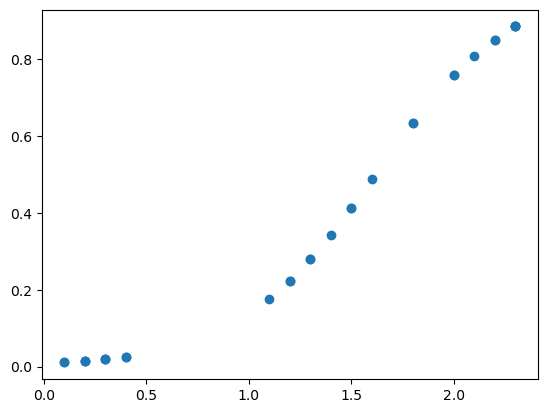

In [25]:
plt.scatter(X_test, logreg_iris.predict_proba(X_test))

In [29]:
X_test, logreg_iris.predict_proba(X_test)

(array([[1.2],
        [0.3],
        [2.3],
        [1.5],
        [1.4],
        [0.4],
        [1.3],
        [2.3],
        [1.5],
        [1.2],
        [2. ],
        [0.1],
        [0.2],
        [0.1],
        [0.3],
        [1.6],
        [2.2],
        [1.1],
        [1.3],
        [2.2],
        [0.2],
        [1.8],
        [0.4],
        [2.1],
        [2. ],
        [2.3],
        [1.8],
        [2.3],
        [0.3],
        [0.2]]),
 array([0.22328895, 0.01912592, 0.88515216, 0.41346268, 0.34329459,
        0.02562015, 0.27936287, 0.88515216, 0.41346268, 0.22328895,
        0.75863653, 0.01060934, 0.01425377, 0.01060934, 0.01912592,
        0.48732985, 0.85108976, 0.17572567, 0.27936287, 0.85108976,
        0.01425377, 0.63350051, 0.02562015, 0.80910364, 0.75863653,
        0.88515216, 0.63350051, 0.88515216, 0.01912592, 0.01425377]))

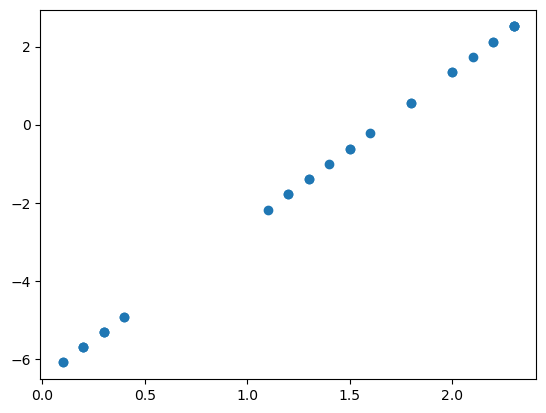

In [26]:
plt.scatter(X_test, -6.48 + 3.91 * X_test)

In [27]:
X_test, -6.48 + 3.91 * X_test

(array([[1.2],
        [0.3],
        [2.3],
        [1.5],
        [1.4],
        [0.4],
        [1.3],
        [2.3],
        [1.5],
        [1.2],
        [2. ],
        [0.1],
        [0.2],
        [0.1],
        [0.3],
        [1.6],
        [2.2],
        [1.1],
        [1.3],
        [2.2],
        [0.2],
        [1.8],
        [0.4],
        [2.1],
        [2. ],
        [2.3],
        [1.8],
        [2.3],
        [0.3],
        [0.2]]),
 array([[-1.788],
        [-5.307],
        [ 2.513],
        [-0.615],
        [-1.006],
        [-4.916],
        [-1.397],
        [ 2.513],
        [-0.615],
        [-1.788],
        [ 1.34 ],
        [-6.089],
        [-5.698],
        [-6.089],
        [-5.307],
        [-0.224],
        [ 2.122],
        [-2.179],
        [-1.397],
        [ 2.122],
        [-5.698],
        [ 0.558],
        [-4.916],
        [ 1.731],
        [ 1.34 ],
        [ 2.513],
        [ 0.558],
        [ 2.513],
        [-5.307],
        [-5.698]]))